In [1]:
!pip install tomotopy &> /dev/null

import pandas as pd
import numpy as np
import tomotopy as tp
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load dataset

df = pd.read_csv('/content/G1obal_Times.csv', encoding='utf-8')

print(len(df))
df.head()

456


,Unnamed: 0,Date,Url,Title,Text,Text1,Text2,YYMM
0,0,2023/12/04,https://www.globaltimes.cn/page/202312/1302994...,NEV penetration rate in Chinese market is fore...,Workers assemble new-energy vehicles (NEVs) a...,worker energy vehicle nevs plant southwest chi...,worker energy vehicle nevs plant southwest chi...,2023/12
1,1,2023/12/04,https://www.globaltimes.cn/page/202312/1303001...,Anti-China institutions spin ‘forced labor’ li...,Slandering Xinjiang -- the new normal of the ...,slandering xinjiang normal empire lie illustra...,slandering xinjiang normal empire lie illustra...,2023/12
2,2,2023/12/04,https://www.globaltimes.cn/page/202312/1303002...,Chinese EV manufacturers lead the way as count...,Illustration: Liu Xiangya/Global TimesIt was ...,illustration liu xiangya global timesit novemb...,illustration xiangya global timesit november b...,2023/12
3,3,2023/12/03,https://www.globaltimes.cn/page/202312/1302956...,"China, Australia should rejoin hands for regio...",Illustration: Xia Qing/Global TimesChina's Mi...,illustration xia qing global timeschina minist...,illustration qing global timeschina ministry c...,2023/12
4,4,2023/12/01,https://www.globaltimes.cn/page/202312/1302835...,Don't read too much into imagined 'China-India...,Illustration: Liu Xiangya/Global TimesWalmart...,illustration liu xiangya global timeswalmart w...,illustration xiangya global timeswalmart world...,2023/12


In [5]:
# Make a 'YY-MM' column

df['YYMM'] = df['Date'].str[:7]
df.head()

,Unnamed: 0,Date,Url,Title,Text,Text1,Text2,YYMM
0,0,2023/12/04,https://www.globaltimes.cn/page/202312/1302994...,NEV penetration rate in Chinese market is fore...,Workers assemble new-energy vehicles (NEVs) a...,worker energy vehicle nevs plant southwest chi...,worker energy vehicle nevs plant southwest chi...,2023/12
1,1,2023/12/04,https://www.globaltimes.cn/page/202312/1303001...,Anti-China institutions spin ‘forced labor’ li...,Slandering Xinjiang -- the new normal of the ...,slandering xinjiang normal empire lie illustra...,slandering xinjiang normal empire lie illustra...,2023/12
2,2,2023/12/04,https://www.globaltimes.cn/page/202312/1303002...,Chinese EV manufacturers lead the way as count...,Illustration: Liu Xiangya/Global TimesIt was ...,illustration liu xiangya global timesit novemb...,illustration xiangya global timesit november b...,2023/12
3,3,2023/12/03,https://www.globaltimes.cn/page/202312/1302956...,"China, Australia should rejoin hands for regio...",Illustration: Xia Qing/Global TimesChina's Mi...,illustration xia qing global timeschina minist...,illustration qing global timeschina ministry c...,2023/12
4,4,2023/12/01,https://www.globaltimes.cn/page/202312/1302835...,Don't read too much into imagined 'China-India...,Illustration: Liu Xiangya/Global TimesWalmart...,illustration liu xiangya global timeswalmart w...,illustration xiangya global timeswalmart world...,2023/12


* perplexity gauges how well a model fits the data
* coherence assesses the quality and interpretability of the topics generated by the model

In [6]:
# A function that checks the perplexity and coherence values

def compute_coherence_values(doc, start, limit, step):
    for i in range(start, limit, step):
        mdl = tp.LDAModel(k=i, seed=7777) # set seed as an anchor in random processing
        mdl.burn_in = 100 # burn_in: remove initial result for better modeling

        for text in doc:
            token = text.split()
            if token:
                mdl.add_doc(token) # topic modeling need tokenized documents

        mdl.train(iter=300, workers=0) # set the number of iteration
        coh = tp.coherence.Coherence(mdl, coherence='c_v')
        coherence_per_topic = coh.get_score()
        perplexity_per_topic = mdl.perplexity

        print('Topic: {}\tLog-likelihood: {}\tPerplexity: {}\tCoherence: {}'\
        .format(
            i,
            mdl.ll_per_word,
            perplexity_per_topic,
            coherence_per_topic
            )
        )

        # store to compare these parameters later
        coherence_values.append(coherence_per_topic)
        perplexities.append(perplexity_per_topic)
        loglikelihoods.append(mdl.ll_per_word)

In [7]:
limit = 50 # maximum topic number
start = 10 # minimum topic number
step = 5 # step unit

# make a list to store the results of parameters
coherence_values = []
perplexities = []
loglikelihoods = []

compute_coherence_values(df['Text1'], start, limit, step) # confirmation of coherence/perplexity takes too much time

<ipython-input-6-cfca33ac5d92>:13: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(iter=300, workers=0) # set the number of iteration


Topic: 10	Log-likelihood: -7.521191529619836	Perplexity: 1846.7664605457517	Coherence: 0.5224113957770168
Topic: 15	Log-likelihood: -7.492585602658975	Perplexity: 1794.686444006831	Coherence: 0.5986412714542044
Topic: 20	Log-likelihood: -7.442735906084558	Perplexity: 1707.4151643547018	Coherence: 0.6087527269101701
Topic: 25	Log-likelihood: -7.421310960583944	Perplexity: 1671.222979728851	Coherence: 0.6182605418860911
Topic: 30	Log-likelihood: -7.450551399144669	Perplexity: 1720.8117379457624	Coherence: 0.6409323618871469
Topic: 35	Log-likelihood: -7.403982197761849	Perplexity: 1642.5122324051138	Coherence: 0.6531538501840883
Topic: 40	Log-likelihood: -7.424277529029605	Perplexity: 1676.1881381860474	Coherence: 0.6617389989690856
Topic: 45	Log-likelihood: -7.383732788758594	Perplexity: 1609.5868155840662	Coherence: 0.6682805934134456


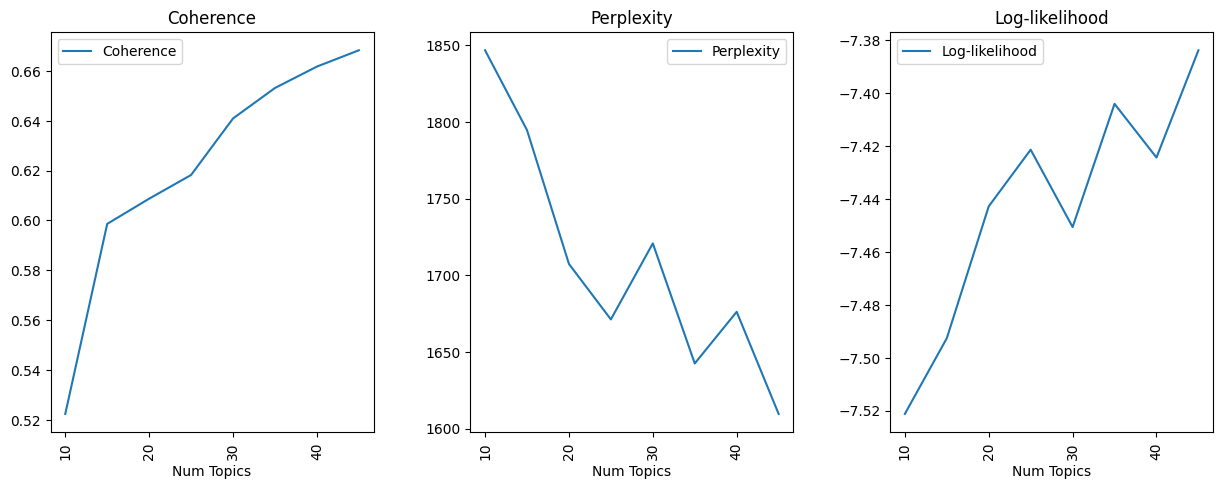

In [8]:
# Make a graph with optimization parameters

x = range(start, limit, step)

mdl_check = pd.DataFrame(list(zip(x, coherence_values, perplexities, loglikelihoods)),
                         columns=['Num Topics', 'Coherence', 'Perplexity', 'Log-likelihood'])

fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3) # we want 1*3 subplots

plt.subplots_adjust(left=0.125, # the left side of the subplots of the figure
                    bottom=0.1, # the bottom of the subplots of the figure
                    right=0.9,  # the right side of the subplots of the figure
                    top=0.9,    # the top of the subplots of the figure
                    wspace=0.3, # the amount of width reserved for blank space between subplots
                    hspace=0.5) # the amount of height reserved for white space between subplots

# plot each measure in a separate subplot
mdl_check.plot(x='Num Topics', y='Coherence', kind='line', ax=ax[0], title='Coherence', rot=90);
mdl_check.plot(x='Num Topics', y='Perplexity', kind='line', ax=ax[1], title='Perplexity', rot=90);
mdl_check.plot(x='Num Topics', y='Log-likelihood', kind='line', ax=ax[2], title='Log-likelihood', rot=90);

In [9]:
# Check the graph above and enter the appropriate topic number into k parameter

mdl = tp.LDAModel(k=25, seed=7777)
mdl.burn_in = 100

for text in df['Text1']:
    token = text.split()
    if token:
        mdl.add_doc(token)

mdl.train(iter=300, workers=0)

<ipython-input-9-0482742ae46f>:11: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(iter=300, workers=0)


In [10]:
# Show keywords per topics

for i in range(mdl.k):
    res = mdl.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res)) # between words and its probability, only print out words

Topic #0	taiwan, island, party, people, mainland, dpp, independence, authority, straits, labor
Topic #1	africa, people, reform, modernization, development, france, committee, government, president, plan
Topic #2	india, soccer, manufacturing, company, chen, dividend, apple, infrastructure, modi, decade
Topic #3	tea, afghanistan, yang, wall, drug, culture, project, world, great, civilization
Topic #4	myanmar, fraud, people, laos, gambling, telecom, china, lin, police, activity
Topic #5	australia, china, relation, minister, trade, relationship, visit, pacific, albanese, year
Topic #6	people, medium, year, life, part, center, research, story, experience, history
Topic #7	port, day, worker, labor, city, railway, union, strike, tourist, holiday
Topic #8	industry, chain, manufacturing, china, supply, company, market, technology, semiconductor, chip
Topic #9	school, child, xizang, student, education, boarding, language, region, family, woman
Topic #10	xinjiang, china, right, labor, region, act

# Visualization (1): tmplot

* To understand the result synchronic  

* https://tmplot.readthedocs.io/en/latest/

* A Python package for visualizing topic modeling results

In [11]:
!pip install tmplot &> /dev/null

import tmplot as tmp


*  This visualization largely outputs three kinds of information

    1) The two-dimensional embedding vector value of the topic output on the left side of HTML.

    2) What is printed in the middle is the keyword that constitutes each topic.

    3) It is a collection of documents in which the topic is of great importance.

In [14]:
# Present all information of topic modeling

tmp.report(model=mdl, docs=df['Text1'], height=400, width=250)

# Visualization (2): with pandas

* To understand the result diachronic  

In [15]:
# Create a variable to check the document linked to the topic

top_docs = [[] for _ in range(mdl.k)]

# Match the top priority topic number for the entire document

for doc in mdl.docs:
    top_docs[doc.get_topics(top_n=1)[0][0]].append(doc)

* np.stack: https://numpy.org/doc/stable/reference/generated/numpy.stack.html  

* get_topic_word_dist: Returns the word distribution for topic topic_id. The value returned is a list of the probabilities of occurrence of each word in the each topic.

* doc_topic_dists: Matrix of document-topic probabilities.

In [16]:
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs]) # extract topic-document distribution
df_topic = pd.DataFrame.from_records(doc_topic_dists) # from np.array ro pd.dataframe

topic_list = [] # generate a list of topic numbers to a column heading

for i in range(len(top_docs)):
    if i < 9:
        tp = "Topic 0" + str(i+1)
    else:
        tp = "Topic " + str(i+1)
    topic_list.append(tp)

df_topic.columns = topic_list
print(topic_list)

['Topic 01', 'Topic 02', 'Topic 03', 'Topic 04', 'Topic 05', 'Topic 06', 'Topic 07', 'Topic 08', 'Topic 09', 'Topic 10', 'Topic 11', 'Topic 12', 'Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19', 'Topic 20', 'Topic 21', 'Topic 22', 'Topic 23', 'Topic 24', 'Topic 25']


In [17]:
# This dataframe made with topic distribution per topics

df_topic['YYMM'] = df['YYMM']
df_topic.head()

,Topic 01,Topic 02,Topic 03,Topic 04,Topic 05,Topic 06,Topic 07,Topic 08,Topic 09,Topic 10,...,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,YYMM
0,0.000252,0.000520,0.000179,0.000177,0.000155,0.000406,0.018363,0.000487,0.108740,0.000284,...,0.009894,0.000786,0.178042,0.009580,0.000135,0.336055,0.164854,0.113175,0.000435,2023/12
1,0.011931,0.000471,0.000162,0.000160,0.000140,0.000368,0.071256,0.000442,0.102461,0.008059,...,0.083084,0.000713,0.005339,0.110106,0.000122,0.047135,0.083105,0.001157,0.055006,2023/12
2,0.000287,0.000594,0.000205,0.000202,0.000177,0.000463,0.030817,0.000557,0.276692,0.000325,...,0.040810,0.040239,0.006730,0.001111,0.000154,0.261041,0.075260,0.001458,0.000497,2023/12
3,0.000153,0.000316,0.000109,0.002723,0.000094,0.512862,0.053005,0.000296,0.026850,0.000173,...,0.008628,0.000478,0.019272,0.047668,0.000082,0.036833,0.092334,0.000776,0.000264,2023/12
4,0.000233,0.004477,0.183907,0.012147,0.000143,0.000376,0.025031,0.000452,0.288657,0.004258,...,0.001194,0.000730,0.009461,0.008891,0.000125,0.000333,0.368697,0.025151,0.012387,2023/12


In [18]:
# Aggregate to same months

df_topic.index = df_topic.YYMM # arrange data monthly
df_topic1 = df_topic.groupby(level=0).agg('sum')
df_topic1

,Topic 01,Topic 02,Topic 03,Topic 04,Topic 05,Topic 06,Topic 07,Topic 08,Topic 09,Topic 10,...,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25
YYMM,,,,,,,,,,,,,,,,,,,,,
2023/02,0.131721,0.680336,0.445395,0.040398,0.226677,0.646747,0.919300,0.301678,1.958062,0.275867,...,2.426842,0.863751,2.738460,2.296240,1.001494,0.003116,0.481246,0.921408,2.102607,2.237358
2023/03,1.575482,5.003444,0.952311,0.732188,0.518289,1.515240,2.361496,3.028696,4.473082,1.874291,...,7.803353,2.795505,5.816085,3.736426,2.970466,0.298946,0.792294,5.088351,6.847917,1.897375
2023/04,2.592815,1.723851,1.544807,1.142004,1.416198,1.301889,2.050577,2.290580,3.186913,1.911134,...,6.281944,1.756182,4.604439,5.358163,1.805669,0.228154,0.885692,3.262781,3.996413,0.838088
2023/05,1.858206,1.141010,0.386954,0.451492,1.372130,3.133779,1.783255,1.252909,2.844506,1.034013,...,4.719354,1.790231,3.796193,4.599065,2.165828,0.280354,0.438399,2.952834,3.032511,0.421992
2023/06,2.697170,0.517899,1.250713,0.412954,0.023655,1.200522,1.487804,1.336628,2.167182,0.414252,...,4.496936,2.078188,3.044232,2.111962,1.887943,0.384564,0.861161,2.343937,2.118859,0.701484
2023/07,1.495324,0.344111,0.584077,0.399821,0.193336,1.379581,1.223945,0.768567,3.645199,0.592439,...,4.966272,1.465726,2.637202,2.071444,1.410905,0.441061,1.620125,2.485175,3.114971,2.129329
2023/08,1.969280,1.745829,0.455823,0.279054,1.390740,1.087803,2.028606,2.122765,5.736754,0.394259,...,7.089172,3.404453,4.692501,3.484152,2.713770,0.373527,1.070261,4.253679,2.809178,0.660841
2023/09,0.441536,0.942949,0.288597,0.934523,0.625076,3.621705,1.771274,1.665599,2.078222,0.616916,...,4.645857,1.640000,1.544667,2.329265,2.209578,0.598182,2.210383,2.528980,2.612639,0.755068
2023/10,0.292476,0.751517,0.415856,0.149181,0.088226,1.877445,2.010710,1.768922,0.577618,0.098709,...,3.163485,0.856433,0.693491,2.267469,1.991600,1.242985,0.181549,2.620612,1.999894,0.572475


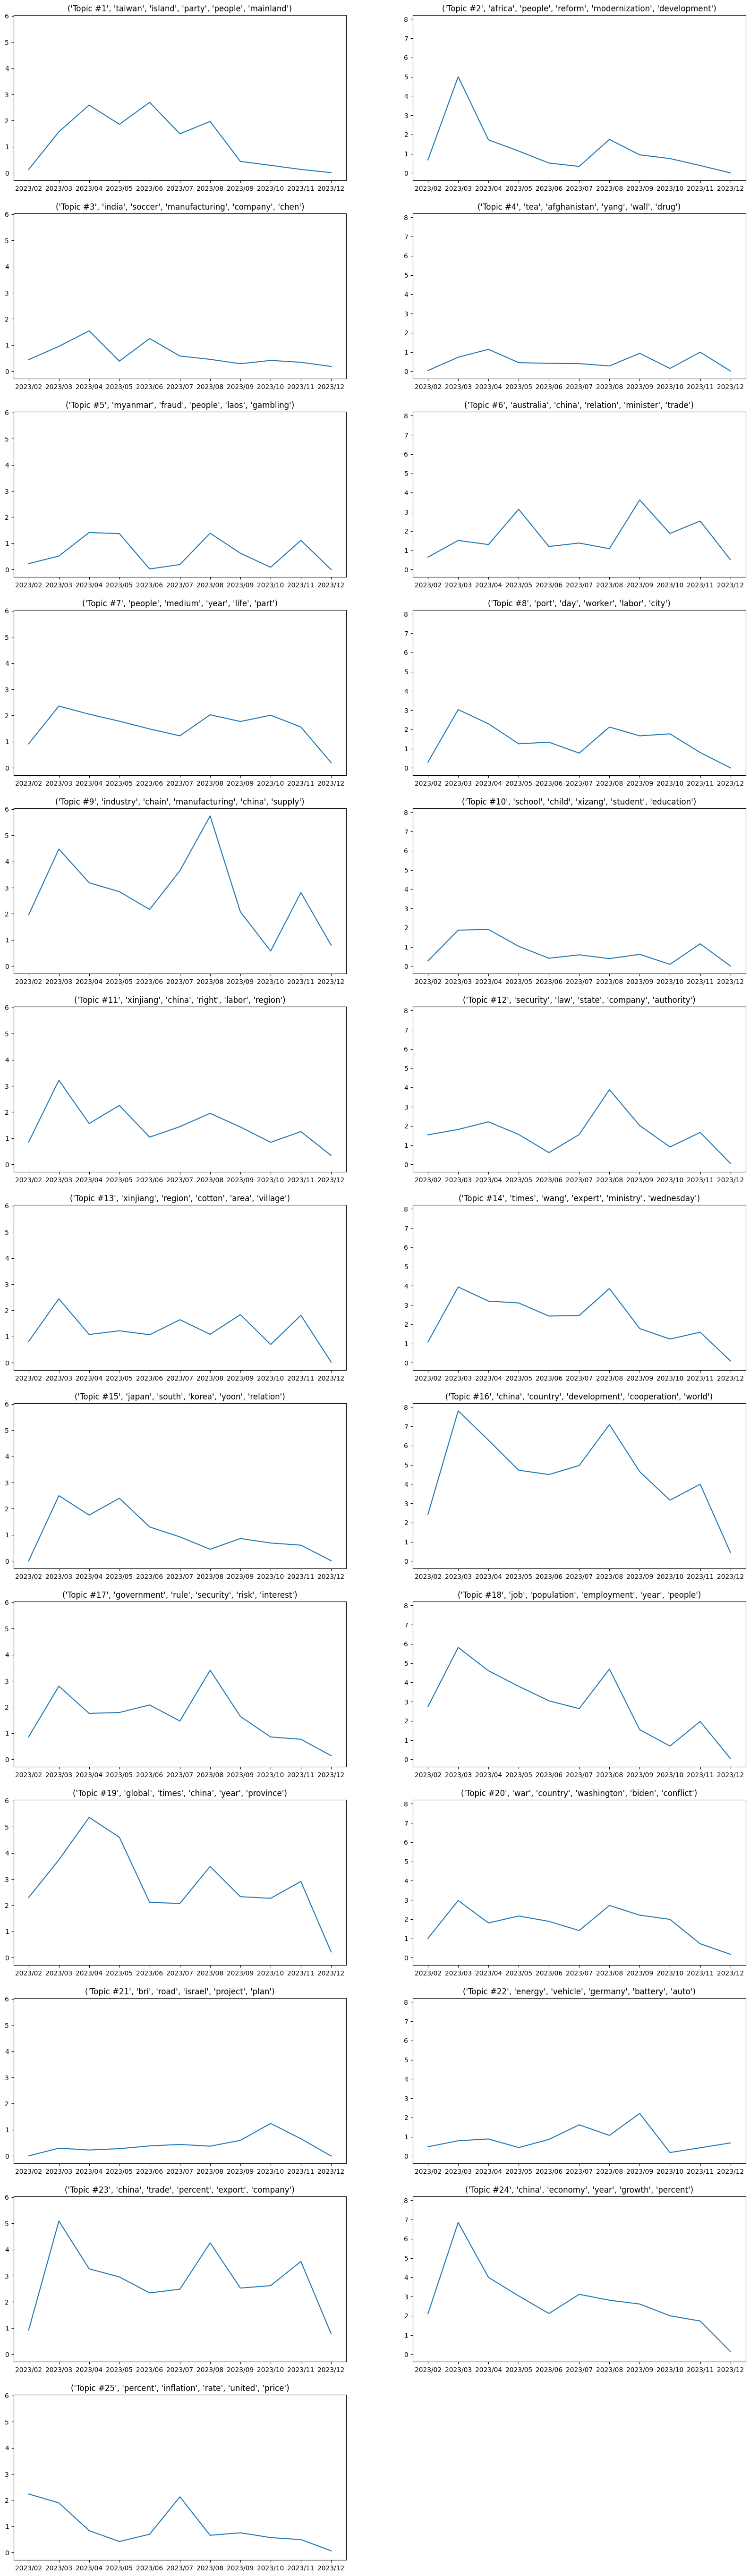

In [19]:
# Present each topic by subplots

fig, axes = plt.subplots(figsize=(20,70), nrows=13, ncols=2, sharey='col') # we have 25 topics so we need at least 25
row = 0; col = 0; cnt = 0

# The code below is set as ncols=2, so you cannot change do not change this for loop iteration

for i in range(mdl.k):
    axes[row, col].plot(df_topic1.index, df_topic1[topic_list[i]])
    axes[row, col].set_title(('Topic #{}'.format(i+1), *(w for w, _ in mdl.get_topic_words(i, top_n=5))), fontsize=12) # extract 5 main keywords per topics to present to title

    if(col == 1): col = 0
    else: col = 1
    cnt += 1 # cnt = cnt+1
    if(cnt % 2 == 0): row += 1 # row = row+1

axes[12, 1].set_visible(False) # we make 26 subplots but the number of topics is 25, so remove final subplot
plt.show()
fig.tight_layout()